In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [2]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
len(df)

180

In [4]:
df.shape

(180, 9)

In [5]:
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df.describe(include = 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [8]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [9]:
df.duplicated().value_counts()

,count
False,180


In [10]:
for i in df.columns:
  print(i, ':', df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


#Categorizing Age, Education, Income and Miles into buckets for better data analysis

Age:

1. Young Adult: from 18 - 25
2. Adults: from 26 - 35
3. Middle Aged Adults: 36-45
4. Elder :46 and above

Education:

1. Primary Education: upto 12
2. Secondary Education: 13 to 15
3. Higher Education: 16 and above

Income:

1. Low Income - Upto 40,000
2. Moderate Income - 40,000 to 60,000
3. High Income - 60,000 to 80,000
4. Very High Income - Above 80,000

Miles:

1. Light Activity - Upto 50 miles
2. Moderate Activity - 51 to 100 miles
3. Active Lifestyle - 101 to 200 miles
4. Fitness Enthusiast - Above 200 miles

In [11]:
#binning the values in buckets and adding the columns in the dataframe
#Age
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

df['age_group'] = pd.cut(df['Age'],bins = bin_range1,labels = bin_labels1)

#Education
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']
df['edu_group'] = pd.cut(df['Education'],bins = bin_range2,labels = bin_labels2)


#Income
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']
df['income_group'] = pd.cut(df['Income'], bins = bin_range3, labels = bin_labels3)

#Miles
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']
df['miles_group'] = pd.cut(df['Miles'], bins = bin_range4, labels = bin_labels4)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


#Univariate Analysis

####Categorical Analysis

####Product Sales Distribution

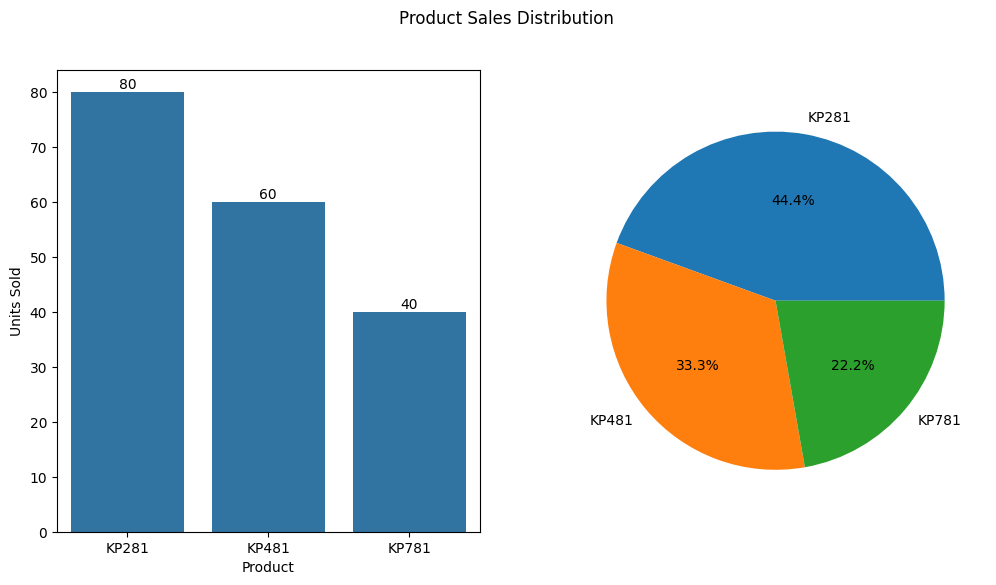

In [12]:
plt.figure(figsize = (12,6))
plt.subplot(2,2,(1,3))
ax_1 = sns.barplot(df['Product'].value_counts())
ax_1.bar_label(ax_1.containers[0])
plt.ylabel('Units Sold')

plt.subplot(2,2,(2,4))
plt.pie(df['Product'].value_counts().values, labels = df['Product'].value_counts().index, autopct = '%.1f%%')

plt.suptitle('Product Sales Distribution')
plt.show()

Observations:

1. KP281 being the entry level product has the highest sales followed by KP781(mid level) and KP481(advance level)
2. Though the units sold differentiate, but the contributions of them are almost same with KP281 sales standing at 120K, KP481 standing at 105k, KP781 standing at 100k

###Gender and Marital Status Distribution

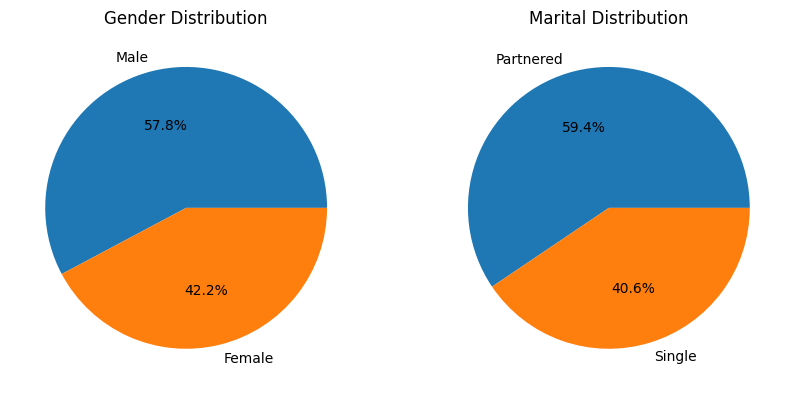

In [13]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.pie(df['Gender'].value_counts().values, labels = df['Gender'].value_counts().index, autopct = '%.1f%%')
plt.title('Gender Distribution')

plt.subplot(1,2,2)
plt.pie(df['MaritalStatus'].value_counts().values, labels = df['MaritalStatus'].value_counts().index, autopct = '%.1f%%')
plt.title('Marital Distribution')
plt.show()

##Fitness & Treadmill Usage per week

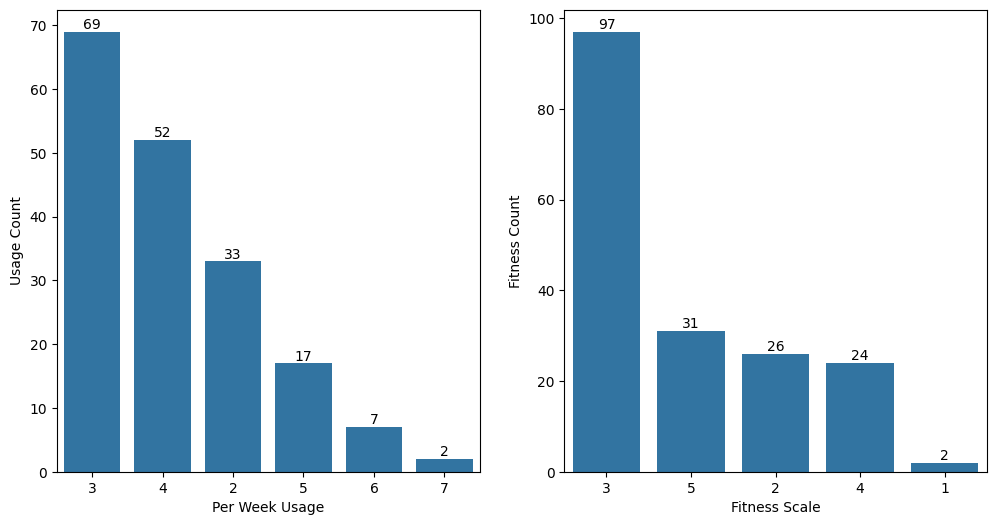

In [14]:
plt.figure(figsize = (12,6))
plt.subplot(2,2,(1,3))
ax_1 = sns.countplot(data = df, x = 'Usage', order = df['Usage'].value_counts().index)
ax_1.bar_label(ax_1.containers[0])
plt.ylabel('Usage Count')
plt.xlabel('Per Week Usage')

plt.subplot(2,2,(2,4))
ax_2 = sns.countplot(data = df, x = 'Fitness', order = df['Fitness'].value_counts().index)
ax_2.bar_label(ax_2.containers[0])
plt.ylabel('Fitness Count')
plt.xlabel('Fitness Scale')
plt.show()

Observations:

1. Almost 98% of customers rated their fitness between 2 - 5.
2. 53% of customers rated their fitness on 3 on a scale of 1-5
3. 85% of customers plan to use treadmill 2 to 4 times a week

Numerical Analysis

##Income Distribution

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Income'>

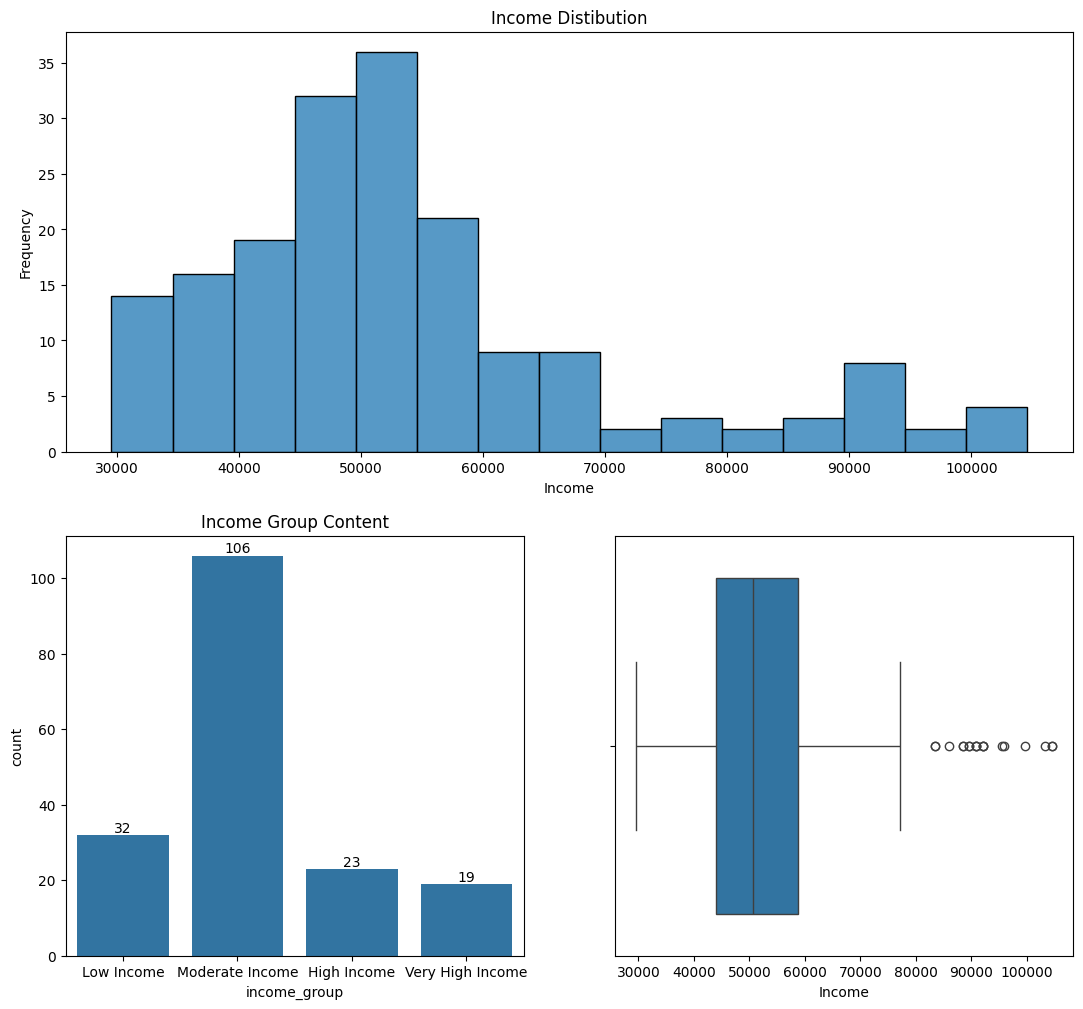

In [15]:
plt.figure(figsize = (13,12))
plt.subplot(2, 2, (1,2))
sns.histplot(data = df, x = 'Income')
plt.ylabel('Frequency')
plt.title('Income Distibution')

plt.subplot(2, 2, 3)
ax_1 = sns.countplot(data = df, x = 'income_group')
ax_1.bar_label(ax_1.containers[0])
plt.title('Income Group Content')

plt.subplot(2, 2, 4)
sns.boxplot(data = df, x = 'Income')

Observations:
1. Among all the income groups, Moderate Income group is highest among them
2. 50% of income fall in the range of 45K - 60K
3. 25% of income fall below 45K

Through this data we can identify that Moderate Income groups are buying treadmills than any other groups

##Education Distribution

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Education'>

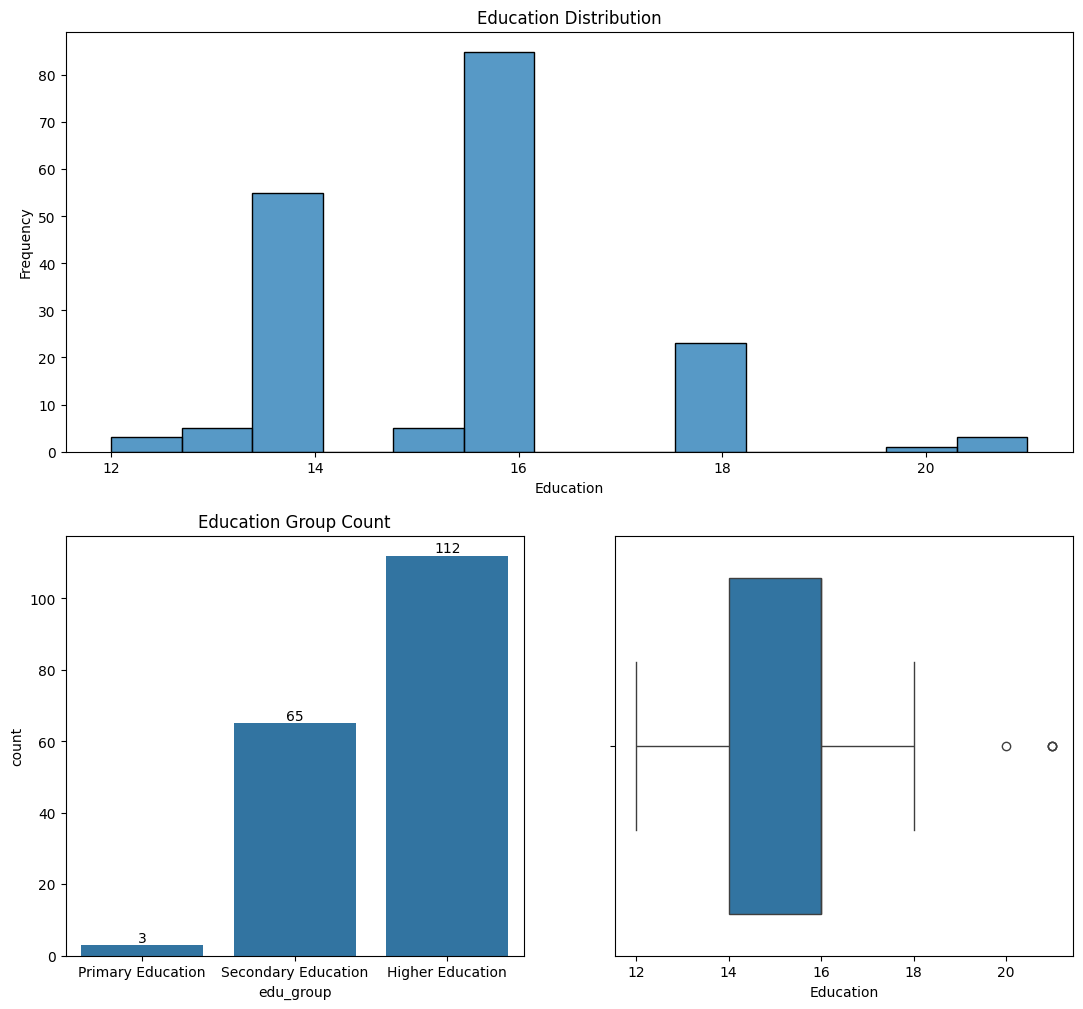

In [16]:
plt.figure(figsize = (13,12))
plt.subplot(2, 2, (1,2))
sns.histplot(data = df, x = 'Education')
plt.ylabel('Frequency')
plt.title('Education Distribution')

plt.subplot(2, 2, 3)
ax_1 = sns.countplot(data = df, x = 'edu_group')
ax_1.bar_label(ax_1.containers[0])
plt.title('Education Group Count')

plt.subplot(2, 2, 4)
sns.boxplot(data = df, x = 'Education')

Observations:
1. 98% of customers have educattion more than 13 years indicating that the product inclination is towards those who has a basic or higher education highlighting the fact that health awareness increases with education.
2. There are 2 outliers present in the data as we can notice it from boxplot

##Age Distribution

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Age'>

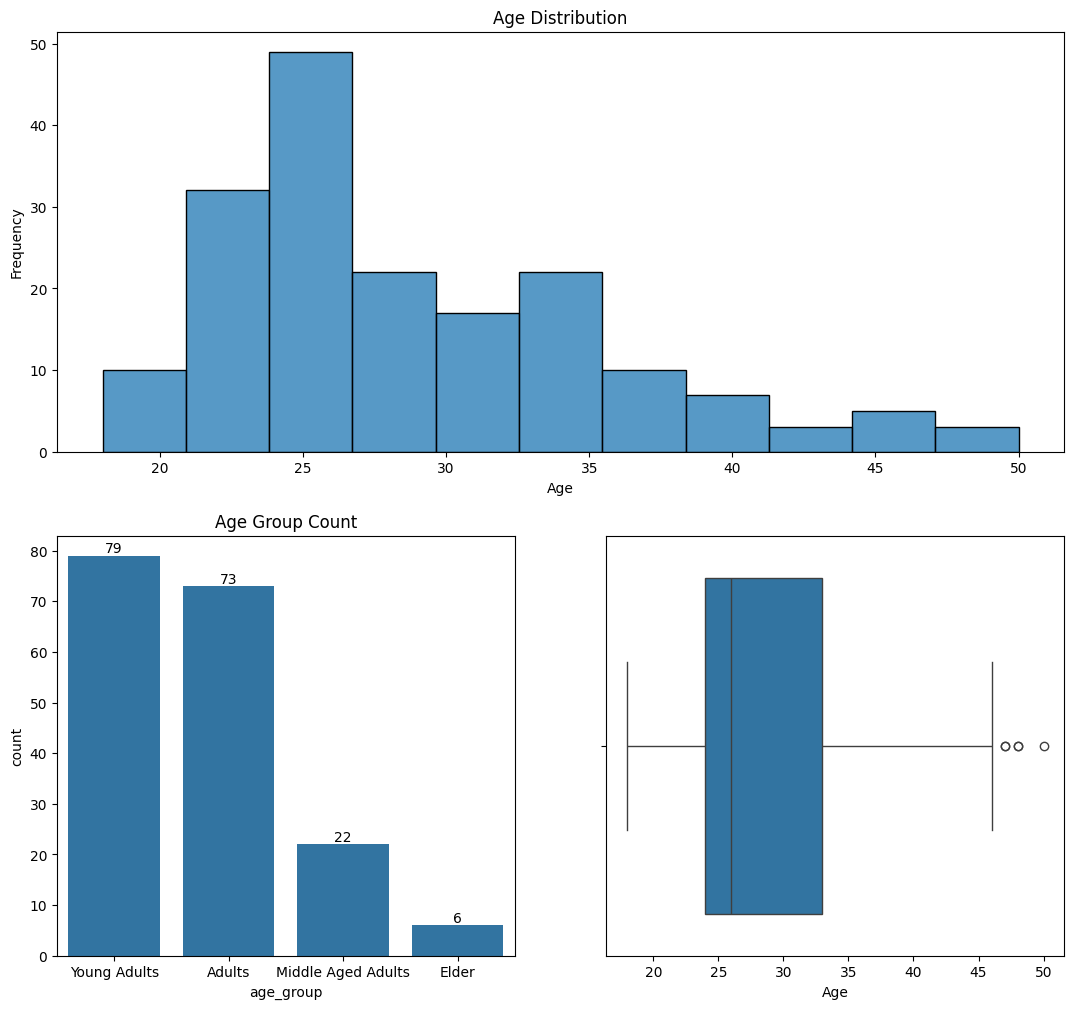

In [17]:
plt.figure(figsize = (13,12))
plt.subplot(2, 2, (1,2))
sns.histplot(data = df, x = 'Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.subplot(2, 2, 3)
ax_1 = sns.countplot(data = df, x = 'age_group')
ax_1.bar_label(ax_1.containers[0])
plt.title('Age Group Count')

plt.subplot(2, 2, 4)
sns.boxplot(data = df, x = 'Age')

Observations:

1. Young Adults & Adults have a higher tendency to buy product
2. As age increases their is a drastic decline in interest.
3. There are 3 outliers in this data

Miles usage per week

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Miles'>

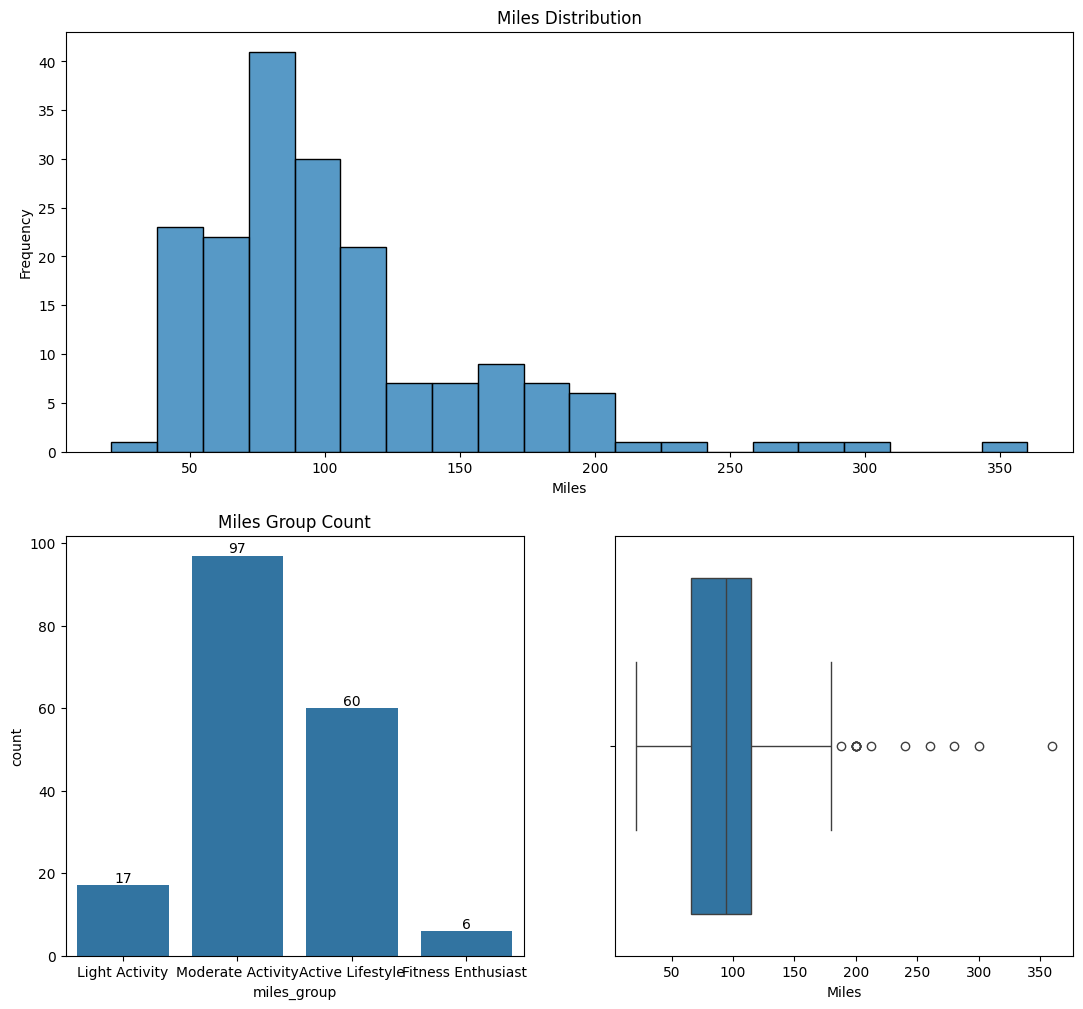

In [18]:
plt.figure(figsize = (13,12))
plt.subplot(2, 2, (1,2))
sns.histplot(data = df, x = 'Miles')
plt.ylabel('Frequency')
plt.title('Miles Distribution')

plt.subplot(2, 2, 3)
ax_1 = sns.countplot(data = df, x = 'miles_group')
ax_1.bar_label(ax_1.containers[0])
plt.title('Miles Group Count')

plt.subplot(2, 2, 4)
sns.boxplot(data = df, x = 'Miles')

Observations:

1. 53% of customers prefer to use product is Moderate Activity which ranges in 51 to 100 miles, while around 33% of customers prefer to use in 101 to 200 miles which falls under Active Lifestyle
2. There are 8 outliers in the miles data

#Bivariate Analysis

####Product vs Age

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

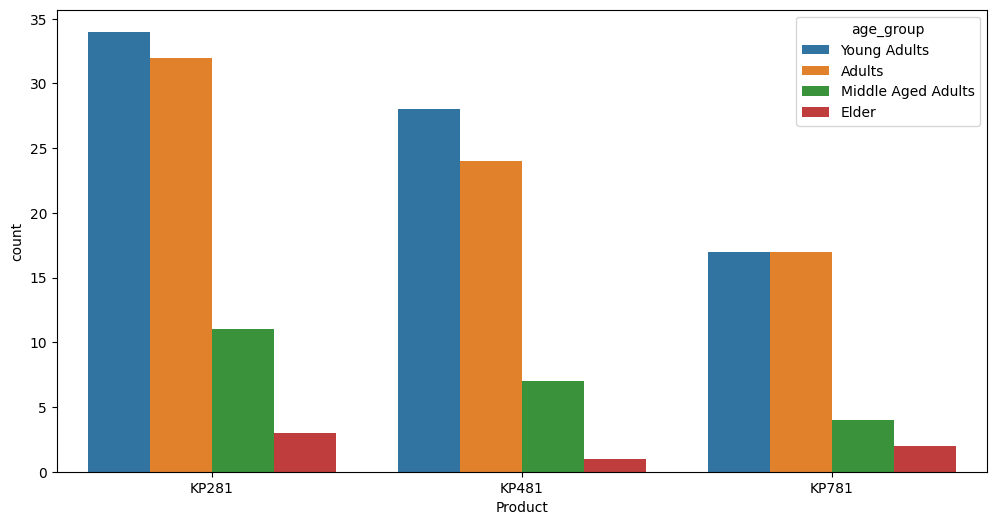

In [19]:
plt.figure(figsize = (12,6))
sns.countplot(data =df, x = 'Product', hue = 'age_group')
plt.show()

Observations:

There is no correlation between Product and Age Distribution as there is a uniform distribution among all the product categories

###Product vs Income

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

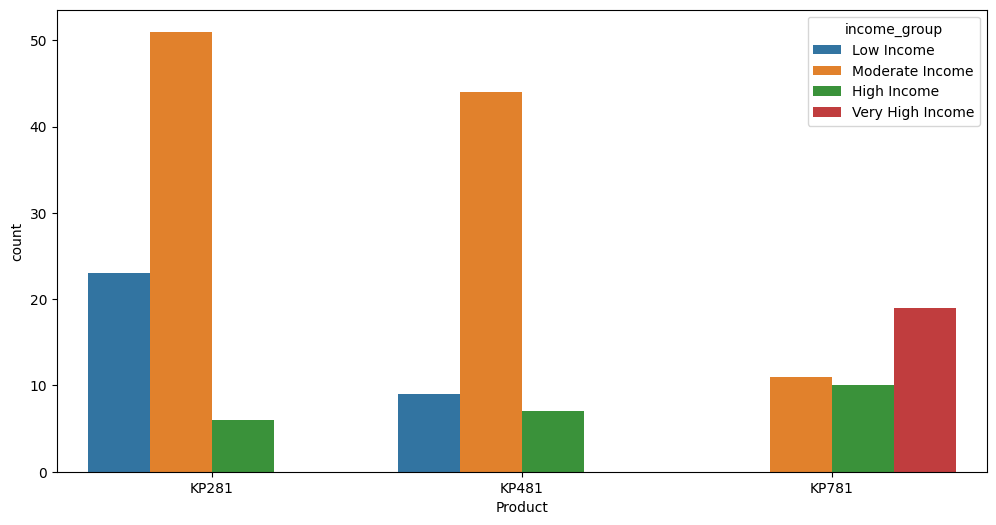

In [20]:
plt.figure(figsize = (12,6))
sns.countplot(data =df, x = 'Product', hue = 'income_group')
plt.show()

Observations:

1. Kp281 and KP481 treadmills are preferred by people with moderate income
2. KP781 having a higher price is preferred by people falling under very High Income group

###Product vs Education

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


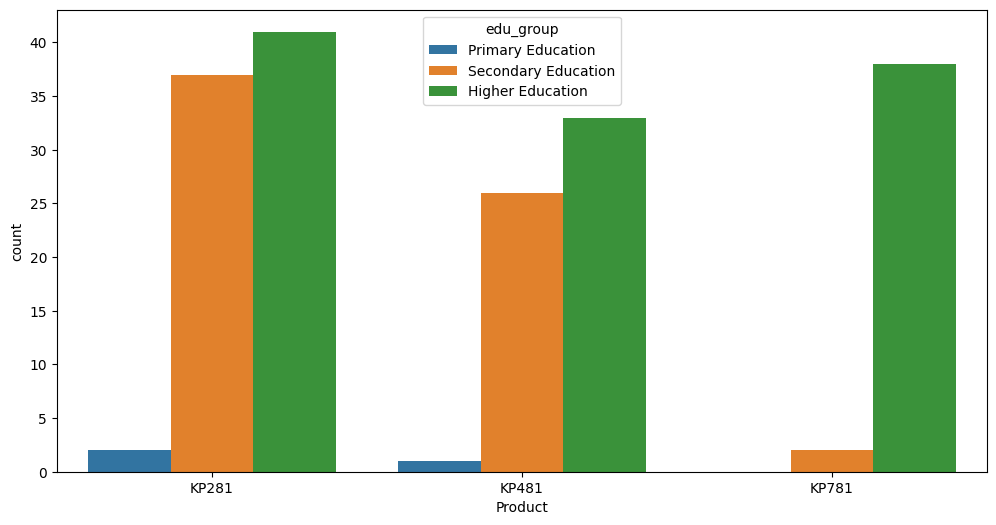

In [21]:
plt.figure(figsize = (12,6))
sns.countplot(data =df, x = 'Product', hue = 'edu_group')
plt.show()

Observation:

1. The analysis clearly signifies that people with high education levels preferred to buy KP781 model.
2. Customers with Secondary and Higher Education are almost same for KP281 and Kp481 models

###Product vs Gender & Product vs Marital Status

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

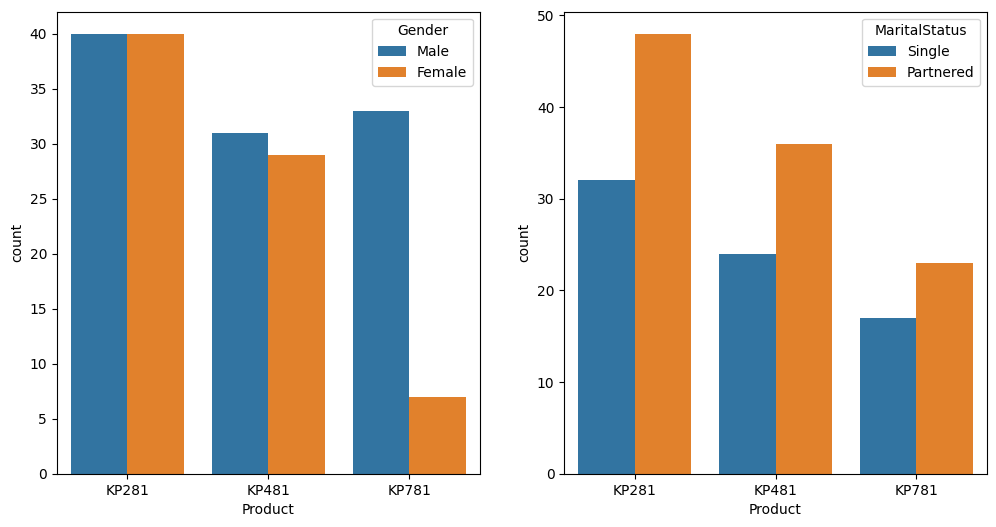

In [22]:
plt.figure(figsize = (12,6))
plt.subplot(2,2,(1,3))
sns.countplot(data =df, x = 'Product', hue = 'Gender')

plt.subplot(2,2,(2,4))
sns.countplot(data =df, x = 'Product', hue = 'MaritalStatus')
plt.show()

Observation:

1. Male customers prefer to buy KP781 treadmill more than female
2. Partnered customers have a higher tendency to buy products

###Gender vs Usage & Gender vs Fitness

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

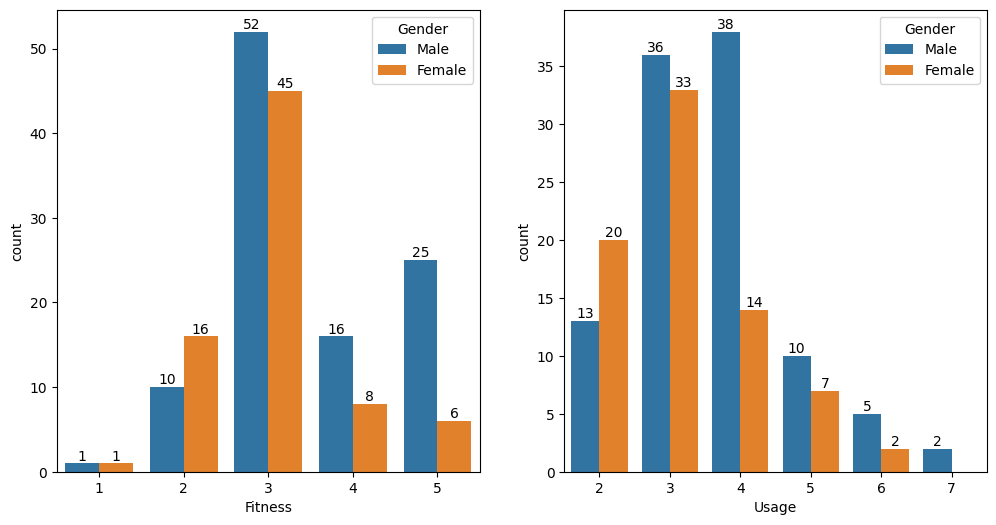

In [23]:
plt.figure(figsize = (12,6))
plt.subplot(2,2,(1,3))
ax_0 = sns.countplot(data = df, x = 'Fitness', hue = 'Gender')
containers_0 = ax_0.containers
for container in containers_0:
    ax_0.bar_label(container, label_type='edge', fontsize=10)

plt.subplot(2,2,(2,4))
ax_1 = sns.countplot(data = df, x = 'Usage', hue = 'Gender')
containers_1 = ax_1.containers
for container in containers_1:
    ax_1.bar_label(container, label_type='edge', fontsize=10)
plt.show()

Observations:

1. Through the graphs we can say that 70% of female customers plan to use the treadmill for 2 to 3 times a week whereas almost 70% of Male customer plan to use the treadmill for 3 to 4 times a week
2. Almost 80% of Female customers rated themselves between 2 to 3 whereas almost 90% of Male customer rated themselves between 3 to 5 on the fitness

###Correlation between Factors

In [24]:
df_deepcopy = copy.deepcopy(df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Figure size 1500x800 with 0 Axes>

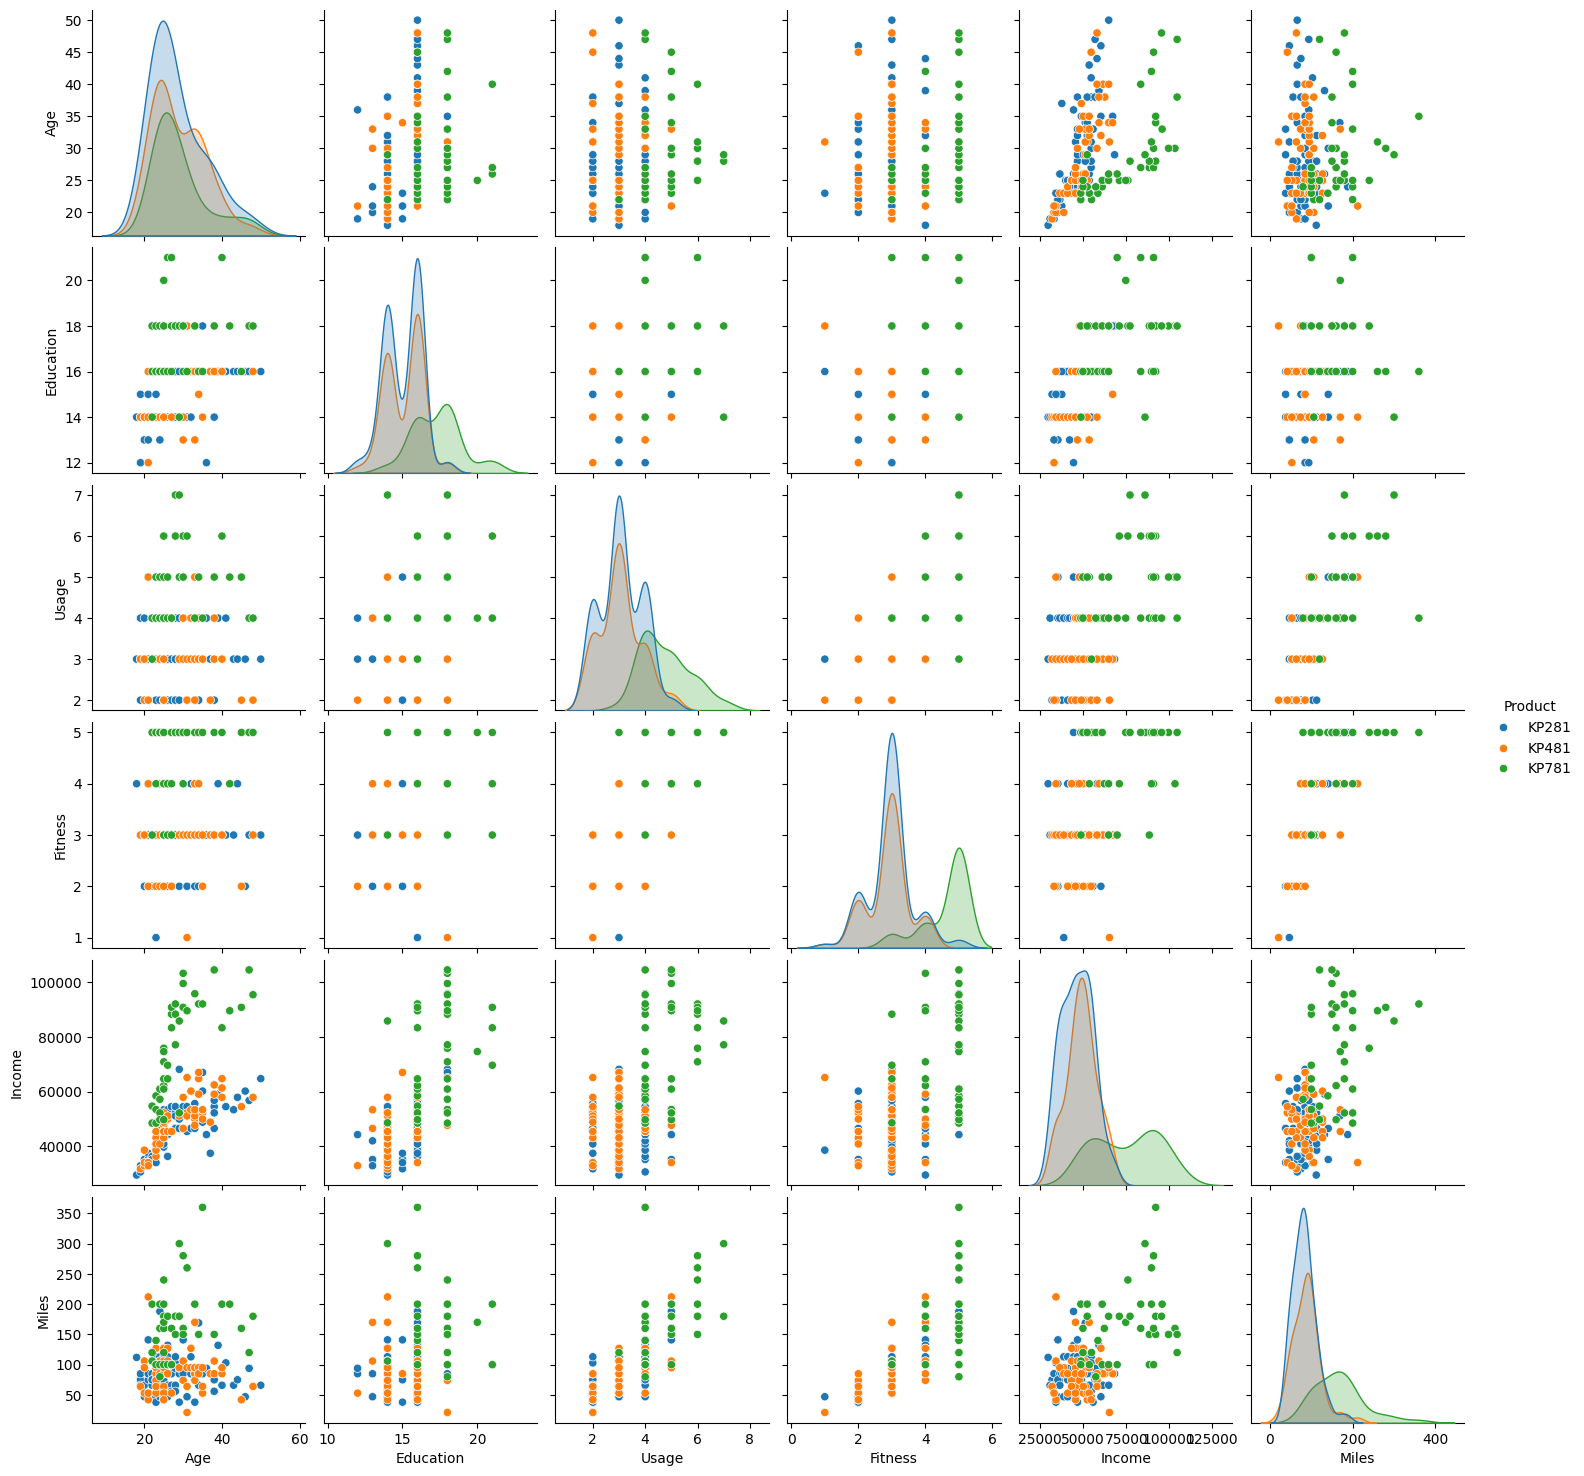

In [25]:
plt.figure(figsize = (15,8))
sns.pairplot(df_deepcopy, hue = 'Product')
plt.show()

Insights:

1. There is a positive correlation between Income and Age
2. With increased income the usage also increases

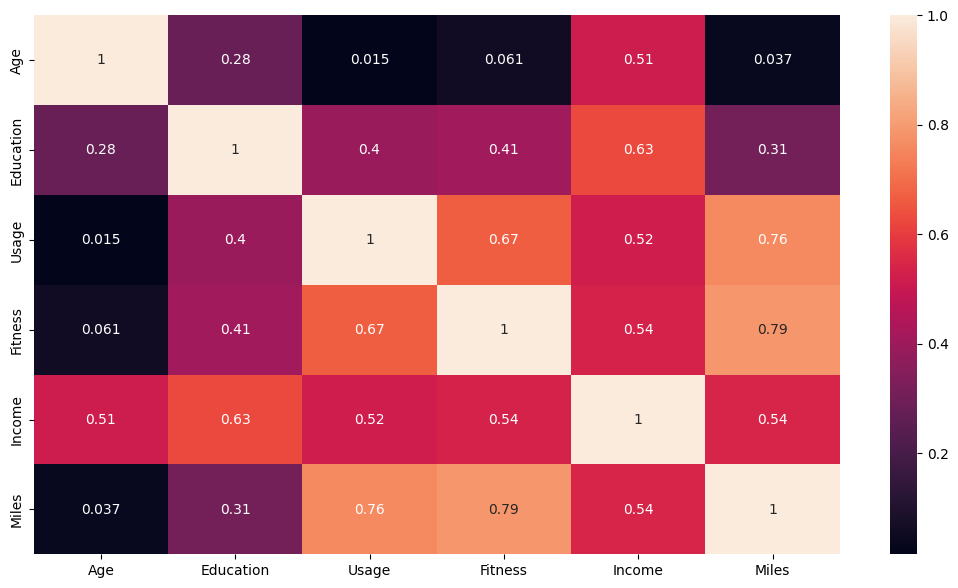

In [26]:
# Drop non-numeric columns
df_numeric = df_deepcopy.select_dtypes(include=['number'])

corr = df_numeric.corr()

plt.figure(figsize = (13,7))
sns.heatmap(corr, annot = True)
plt.show()

Insights:

1. Education and Income are income are highly correlated.
2. Fitness is highly correlated with Usage and miles as people who are fit will generally go for more miles and will use more the product than the rest of the audience.

###Determining Marginal & Conditional Probability

####Probability of Product Purchase w.r.t. Gender

In [27]:
pd.crosstab(index = df['Product'], columns = df['Gender'], margins = True, normalize = True).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


1. The Probability of a treadmill being purchased by a female is 42%.

    * The conditional probability of purchasing the treadmill model given that the customer is female is

    * For Treadmill model KP281 - 22%

    * For Treadmill model KP481 - 16%

    * For Treadmill model KP781 - 4%

2. The Probability of a treadmill being purchased by a male is 58%.

    * The conditional probability of purchasing the treadmill model given that the customer is male is -

    * For Treadmill model KP281 - 22%

    * For Treadmill model KP481 - 17%

    * For Treadmill model KP781 - 18%

####Probability of Product Purchase w.r.t. Education

In [28]:
pd.crosstab(index = df['Product'], columns = df['edu_group'], margins = True, normalize = True).round(2)

edu_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


1. The Probability of a treadmill being purchased by a customer with Higher Education(Above 15 Years) is 62%.

  The conditional probability of purchasing the treadmill model given that the customer has Higher Education is

    * For Treadmill model KP281 - 23%

    * For Treadmill model KP481 - 18%

    * For Treadmill model KP781 - 21%


2. The Probability of a treadmill being purchased by a customer with Secondary Education(13-15 yrs) is 36%.

  The conditional probability of purchasing the treadmill model given that the customer has Secondary Education is -

    * For Treadmill model KP281 - 21%

    * For Treadmill model KP481 - 14%

    * For Treadmill model KP781 - 1%

The Probability of a treadmill being purchased by a customer with Primary Education(0 to 12 yrs) is only 2%.

####Probability of Product Purchase w.r.t. Age

In [29]:
pd.crosstab(index = df['Product'], columns = df['age_group'], margins = True, normalize = True).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


1. The Probability of a treadmill being purchased by a Young Adult(18-25) is 44%.

  The conditional probability of purchasing the treadmill model given that the customer is Young Adult is

      * For Treadmill model KP281 - 19%

      * For Treadmill model KP481 - 16%

      * For Treadmill model KP781 - 9%

2. The Probability of a treadmill being purchased by a Adult(26-35) is 41%.

  The conditional probability of purchasing the treadmill model given that the customer is Adult is -

      * For Treadmill model KP281 - 18%

      * For Treadmill model KP481 - 13%

      * For Treadmill model KP781 - 9%

The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%.

The Probability of a treadmill being purchased by a Elder(Above 45) is only 3%.

####Probability of product purchase w.r.t. Marital Status

In [30]:
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


1. The Probability of a treadmill being purchased by a Married Customer is 59%.

  The conditional probability of purchasing the treadmill model given that the customer is Married is

      * For Treadmill model KP281 - 27%

      * For Treadmill model KP481 - 20%

      * For Treadmill model KP781 - 13%

2. The Probability of a treadmill being purchased by a Unmarried Customer is 41%.

  The conditional probability of purchasing the treadmill model given that the customer is Unmarried is -

      * For Treadmill model KP281 - 18%

      * For Treadmill model KP481 - 13%

      * For Treadmill model KP781 - 9%

####Probability of product purchase w.r.t. Income

In [31]:
pd.crosstab(index =df['Product'],columns = df['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


1. The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59%.

  The conditional probability of purchasing the treadmill model given that the customer has Moderate Income is

      * For Treadmill model KP281 - 28%

      * For Treadmill model KP481 - 24%

      * For Treadmill model KP781 - 6%



2. The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.

  The conditional probability of purchasing the treadmill model given that the customer has Low Income is

      * For Treadmill model KP281 - 13%

      * For Treadmill model KP481 - 5%

      * For Treadmill model KP781 - 0%


3. The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%

  The conditional probability of purchasing the treadmill model given that the customer has High Income is

      * For Treadmill model KP281 - 3%

      * For Treadmill model KP481 - 4%

      * For Treadmill model KP781 - 6%


4. The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%

  The conditional probability of purchasing the treadmill model given that the customer has High Income is

      * For Treadmill model KP281 - 0%

      * For Treadmill model KP481 - 0%

      * For Treadmill model KP781 - 11%

####Probability of product purchase w.r.t. Weekly Usage

In [32]:
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


1. The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%.

  The conditional probability of purchasing the treadmill model given that the customer has Usage 3 per week is

      * For Treadmill model KP281 - 21%

      * For Treadmill model KP481 - 17%

      * For Treadmill model KP781 - 1%

2. The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.

  The conditional probability of purchasing the treadmill model given that the customer has Usage 4 per week is

      * For Treadmill model KP281 - 12%

      * For Treadmill model KP481 - 7%

      * For Treadmill model KP781 - 10%

3. The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%

  The conditional probability of purchasing the treadmill model given that the customer has Usage 2 per week is

      * For Treadmill model KP281 - 11%

      *For Treadmill model KP481 - 8%

      *For Treadmill model KP781 - 0%



####Probability of product purchase w.r.t. Customer Fitness

In [33]:
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


1. The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%.

  The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is

      * For Treadmill model KP281 - 30%

      * For Treadmill model KP481 - 22%

      * For Treadmill model KP781 - 2%

2. The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15%.

3. The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%.

####Probability of product purchase w.r.t. weekly usage

In [34]:
pd.crosstab(index =df['Product'],columns = df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


1. The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%.

  The conditional probability of purchasing the treadmill model given that the customer has Light Activity Lifestyle is

      * For Treadmill model KP281 - 7%

      * For Treadmill model KP481 - 3%

      * For Treadmill model KP781 - 0%

2. The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54%.

  The conditional probability of purchasing the treadmill model given that the customer with lifestyle of Moderate Activity is

      * For Treadmill model KP281 - 28%

      *For Treadmill model KP481 - 22%

      *For Treadmill model KP781 - 4%

3. The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33%.

  The conditional probability of purchasing the treadmill model given that the customer has Active Lifestyle is

      * For Treadmill model KP281 - 10%

      * For Treadmill model KP481 - 8%

      *For Treadmill model KP781 - 15%

4. The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only

###Customer Profiling
Based on above analysis

Probability of purchase of KP281 = 44%

Probability of purchase of KP481 = 33%

Probability of purchase of KP781 = 22%

1. Customer Profile for KP281 Treadmill -

      * Age of customer mainly between 18 to 35 years with few between 35 to 50 years
      *Education level of customer 13 years and above
      *Annual Income of customer below USD 60,000
      *Weekly Usage - 2 to 4 times
      *Fitness Scale - 2 to 4
      *Weekly Running Mileage - 50 to 100 miles

2. Customer Profile for KP481 Treadmill -

      * Age of customer mainly between 18 to 35 years with few between 35 to 50 years
      *Education level of customer 13 years and above
      *Annual Income of customer between USD 40,000 to USD 80,000
      *Weekly Usage - 2 to 4 times
      *Fitness Scale - 2 to 4
      *Weekly Running Mileage - 50 to 200 miles

3. Customer Profile for KP781 Treadmill -

      * Gender - Male
      *Age of customer between 18 to 35 years
      *Education level of customer 15 years and above
      *Annual Income of customer USD 80,000 and above
      *Weekly Usage - 4 to 7 times
      *Fitness Scale - 3 to 5
      *Weekly Running Mileage - 100 miles and above

##Recommendations

Launching marketing campaigns for treadmills

  * Partnering up with different business entities which are into fitness and health domain to sell the treadmills thus increasing the sales of the higher end products.

Introudcing Affordable Pricing and Payment Plans

  * Given that most of the buyers include customers with moderate income and in the age group of young adults and adults, it's crucial to offer treadmills at affordable price point with an easy payment option plan like an EMI based option.

Increasing the usage of the product

  * Provide an app which mostly focuses on user analytics like user's weekly running status, real time estimation of the progress. So just to keep them engaged with the product and enhance their experience.

